Link Tableau

https://public.tableau.com/views/h8dsft_Milestone1_Amelia_PS/Dashboard2?:language=en-US&publish=yes&:sid=&:display_count=n&:origin=viz_share_link

-------
# Milestone 1

-------

# 1. Introduction

Perkenalkan, saya Amelia Puspita Sari sebagai salah satu student di bootcamp Data Science Hacktiv8, kelas Remote batch ke-30. 

Pada milestone pertama ini adalah pengolahan dataset yang diambil dari kaggle mengenai resiko stroke. Dengan diambilnya dataset ini, guna menerapkan ilmu selama satu bulan pertama atau Preparation Phase yang meliputi :

- Statistics (descriptive dan inferential),
- Data Visualization
- Data story telling

# 2. Identifikasi Masalah

----------
            "Peningkatan Kesadaran Tentang Resiko Penyakit Stroke yang Dipengaruhi oleh Gaya Hidup"

Menurut WHO, penyakit stroke merupakan peringkat kedua penyebab 11% kematian di seluruh dunia. Stroke terjadi ketika aliran darah ke otak tersumbat atau terhenti, sehingga menyebabkan kerusakan pada sel-sel otak yang dapat berdampak serius pada kemampuan seseorang untuk bergerak, berbicara, atau bahkan berfungsi secara normal. Faktor resiko utama untuk stroke meliputi tekanan darah tinggi, penyakit jantung, diabetes, merokok, obesitas, dan gaya hidup tidak sehat lainnya.

Namun, banyak kasus stroke dapat dicegah melalui perubahan gaya hidup yang sehat dan penanganan faktor resiko yang tepat. Kesadaran akan faktor-faktor resiko ini dan pentingnya menerapkan gaya hidup yang sehat dapat membantu mengurangi jumlah kasus stroke yang terjadi.

Melalui edukasi yang tepat, pemberian informasi yang akurat, dan promosi gaya hidup sehat, masyarakat dapat lebih memahami bagaimana gaya hidup dapat memengaruhi resiko terjadinya stroke. Dengan demikian, diharapkan akan terjadi penurunan angka kasus stroke dan peningkatan kesehatan masyarakat secara keseluruhan.

----------

Identifikasi masalah:

- Apakah umur mempengaruhi terkena stroke?

- Apakah BMI dan kadar glukosa dapat meningkatkan resiko terkena stroke?

- Apakah beban kerja (workload) dan gender dapat mempengaruhi, terutama lelaki lebih beresiko terkena stroke?

- Apakah merokok sebagai salah satu penyebab stroke?

- Apakah orang pengidap penyakit jantung beresiko terkena stroke?

# 3. Data Loading

data diambil dari kaggle yang kemudian disimpan dalam format csv:

https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset/data

In [3]:
import pandas as pd

df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


Attribute Information

1) id: unique identifier
2) gender: "Male", "Female" atau "Other"
3) age: usia
4) hypertension: 0 jika tidak mengidap hypertension, 1 mengidap hypertension
5) heart_disease: 0 jika tidak ada penyakit jantung, 1 jika ada penyakit jantung
6) ever_married: "No" atau "Yes"
7) work_type: "children", "Govt_jov", "Never_worked", "Private" , "Self-employed"
8) Residence_type: "Rural" , "Urban"
9) avg_glucose_level: average glucose level in blood
10) bmi: body mass index / berat badan
11) smoking_status: "formerly smoked", "never smoked", "smokes", "Unknown"*
12) stroke: 1 pengidap stroke or 0 jika tidak mengidap stroke
*Note: "Unknown" di smoking_status tidak ada informasi mengenai pasien ini

# 4. Data Cleaning

Setelah load data, di bagian ini akan melakukan eksplorasi data serta cleaning data sesuai dengan topik yang ingin disampaikan.

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [126]:
#cek berapa row dan column
df.shape

(5110, 12)

In [127]:
#hitung missing value dari masing masing kolom
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Handle missing value di kolom BMI

In [4]:
# rata-rata bmi
mean_bmi = df['bmi'].mean()

# isi missing value di kolom bmi
df['bmi'] = df['bmi'].fillna(mean_bmi)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
df = df.drop('id', axis=1)
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


Take out . dan 0 di kolom `age` dan ubah data type menjadi integer

In [6]:
# konversi ke integer
df['age'] = df['age'].astype(int)

df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


Statistik data numerik

In [5]:
round (df.describe(exclude = 'object'), 2)

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.00,5110.0,5110.00,5110.00,5110.00,5110.00
mean,43.22,0.1,0.05,106.15,28.89,0.05
std,22.63,0.3,0.23,45.28,7.70,0.22
min,0.00,0.0,0.00,55.12,10.30,0.00
25%,25.00,0.0,0.00,77.24,23.80,0.00
50%,45.00,0.0,0.00,91.88,28.40,0.00
75%,61.00,0.0,0.00,114.09,32.80,0.00
max,82.00,1.0,1.00,271.74,97.60,1.00


Statistik data kategorikal

In [6]:
round (df.describe(exclude = ['float', 'int']),2)

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


Insight awal dari data :

- data kategorik : gender, ever_married, work_type, Residence_type, smoking_status

- data numerik : hypertension, heart_disease, stroke

- data numerik kontinyu : age, avg_glucose_level, bmi

- mayoritas data dalam object sehingga perlu diperhatikan untuk visualisasi

- age, bmi dan glucose level akan dikategorikan dengan menggunakan binning supaya memudahkan dalam visualisasi data

In [7]:
# buat dict yang berisi kolom kategori untuk age, bmi dan glucose level
numerical_bins = {
    'bmi': {'bins': [0, 19, 25, 30, 100], 'labels': ['Underweight', 'Ideal', 'Overweight', 'Obesity']},
    'age': {'bins': [0, 13, 18, 45, 60, 100], 'labels': ['Children', 'Teens', 'Young Adults', 'Adults', 'Elderly']},
    'avg_glucose_level': {'bins': [0, 90, 160, 230, 500], 'labels': ['Low', 'Normal', 'High', 'Very High']}
}

# looping untuk melakukan binning pada setiap variabel numerik
for col, bin_params in numerical_bins.items():
    # Binning menggunakan pd.cut()
    df[f'{col}_cat'] = pd.cut(df[col], bins=bin_params['bins'], labels=bin_params['labels'])

df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_cat,age_cat,avg_glucose_level_cat
0,Male,67,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1,Obesity,Elderly,High
1,Female,61,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1,Overweight,Elderly,High
2,Male,80,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1,Obesity,Elderly,Normal
3,Female,49,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1,Obesity,Adults,High
4,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1,Ideal,Elderly,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0,Overweight,Elderly,Low
5106,Female,81,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0,Obesity,Elderly,Normal
5107,Female,35,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0,Obesity,Young Adults,Low
5108,Male,51,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0,Overweight,Adults,High


In [8]:
df['gender'].value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

In [8]:
df['gender'] = df['gender'].replace('Other', 'Male')

# mapping kategori gender menjadi numerik
gender_mapping = {'Female': 1, 'Male': 2}

# membuat kolom baru dengan nama gender_cat
df['gender_cat'] = df['gender'].map(gender_mapping)

# ubah tipe data menjadi integer
df['gender_cat'] = df['gender_cat'].astype(int)

df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_cat,age_cat,avg_glucose_level_cat,gender_cat
0,Male,67,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1,Obesity,Elderly,High,2
1,Female,61,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1,Overweight,Elderly,High,1
2,Male,80,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1,Obesity,Elderly,Normal,2
3,Female,49,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1,Obesity,Adults,High,1
4,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1,Ideal,Elderly,High,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0,Overweight,Elderly,Low,1
5106,Female,81,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0,Obesity,Elderly,Normal,1
5107,Female,35,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0,Obesity,Young Adults,Low,1
5108,Male,51,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0,Overweight,Adults,High,2


In [10]:
df['work_type'].value_counts()

work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

In [9]:
import numpy as np

# buat filter untuk mengkategorikan data
work_type_conditions = [
    (df['work_type'] == 'Private'),
    (df['work_type'] == 'Self-employed'),
    (df['work_type'] == 'children'),
    (df['work_type'] == 'Govt_job'),
    (df['work_type'] == 'Never_worked')
]

# buat daftar label kategori yang sesuai
work_type_categories = [1, 2, 3, 4, 5]

df['work_cat'] = np.select(work_type_conditions, work_type_categories, default=np.nan)

# ubah nan value ke tipe float
df['work_cat'] = df['work_cat'].astype(float)

# ubah tipe data menjadi integer
df['work_cat'] = df['work_cat'].astype(int)

df


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_cat,age_cat,avg_glucose_level_cat,gender_cat,work_cat
0,Male,67,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1,Obesity,Elderly,High,2,1
1,Female,61,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1,Overweight,Elderly,High,1,2
2,Male,80,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1,Obesity,Elderly,Normal,2,1
3,Female,49,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1,Obesity,Adults,High,1,1
4,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1,Ideal,Elderly,High,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0,Overweight,Elderly,Low,1,1
5106,Female,81,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0,Obesity,Elderly,Normal,1,2
5107,Female,35,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0,Obesity,Young Adults,Low,1,2
5108,Male,51,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0,Overweight,Adults,High,2,1


# 5. Analisis dan Perhitungan

### 5.1 Statistik deskriptif

Disini akan menghitung central tendency(mean, median, std dev) dan distribusi dari :

- age 

- BMI

- glukosa level

- workload

- gender

In [13]:
#central tendency age
avg_age = df['age'].mean()
median_age = df['age'].median()
std_age = df['age'].std()
skew_age = df['age'].skew()
kurtosis_age = df['age'].kurtosis()

print("Average age: ", avg_age)
print("Median age: ", median_age)
print("Standar deviation age: ", std_age)
print("Skewness age:", skew_age)
print("Kurtosis age:", kurtosis_age)

Average age:  43.21526418786693
Median age:  45.0
Standar deviation age:  22.633865752854724
Skewness age: -0.1404253802465047
Kurtosis age: -0.9857140793464798


Rata-rata umur dari sampel adalah 43.22 tahun, atau kita bulatkan menjadi 43 tahun, dengan median 45 tahun. Variasi dari umur ini juga luas.

Sementara untuk skewness sudah hampir mendekati 0 atau hampir simetris. Begitu juga dengan kurtosisnya, mendekati nol dimana data hampir terdistribusi normal dan ekornya tidak menunjukkan adanya outlier yang ekstrem.

In [14]:
avg_bmi = df['bmi'].mean()
median_bmi = df['bmi'].median()
std_bmi = df['bmi'].std()
skew_bmi = df['bmi'].skew()
kurtosis_bmi = df['bmi'].kurtosis()

print("Average bmi: ", avg_bmi)
print("Median bmi: ", median_bmi)
print("Standar deviation bmi: ", std_bmi)
print("Skewness bmi:", skew_bmi)
print("Kurtosis bmi:", kurtosis_bmi)

Average bmi:  28.893236911794663
Median bmi:  28.4
Standar deviation bmi:  7.698017826857077
Skewness bmi: 1.0767160713842094
Kurtosis bmi: 3.6230613267307876


Rata-rata BMI dari sampel adalah sekitar 28.89 dengan median 28.4 . Variasi data BMI ini juga luas.

Skewness positif menunjukkan bahwa distribusi data miring ke kiri, dan kurtosis yang puncaknya tinggi (leptokurtik) menunjukkan bahwa distribusi BMI memiliki ekor yang mengindikasikan adanya outlier.

In [15]:
avg_glu = df['avg_glucose_level'].mean()
median_glu = df['avg_glucose_level'].median()
std_glu = df['avg_glucose_level'].std()
skew_glu = df['avg_glucose_level'].skew()
kurtosis_glu = df['avg_glucose_level'].kurtosis()

print("Average glucose level: ", avg_glu)
print("Median glucose level: ", median_glu)
print("Standar deviation glucose level: ", std_glu)
print("Skewness glucose level:", skew_glu)
print("Kurtosis glucose level:", kurtosis_glu)

Average glucose level:  106.1476771037182
Median glucose level:  91.88499999999999
Standar deviation glucose level:  45.28356015058203
Skewness glucose level: 1.5722838665030459
Kurtosis glucose level: 1.6804785404038278


Rata-rata kadar glukosa pada sampel ini adalah sekitar 106.15 mg/dL dengan median 91.88 mg/dL. Variasi data BMI ini juga luas.

Skewness positif menunjukkan bahwa distribusi glukosa condong miring ke kiri. Kurtosis pun juga positif menunjukkan bahwa mengindikasikan adanya outlier di ekor distribusi data.

In [16]:
avg_work_cat = df['work_cat'].mean()
median_work_cat = df['work_cat'].median()
std_work_cat = df['work_cat'].std()
skew_work_cat = df['work_cat'].skew()
kurtosis_work_cat = df['work_cat'].kurtosis()

print("Average workload: ", avg_work_cat)
print("Median workload: ", median_work_cat)
print("Standar deviation workload: ", std_work_cat)
print("Skewness workload:", skew_work_cat)
print("Kurtosis workload:", kurtosis_work_cat)

Average workload:  1.8320939334637965
Median workload:  1.0
Standar deviation workload:  1.109923969657709
Skewness workload: 0.9747249095124889
Kurtosis workload: -0.4956614759178959


Nilai skewness positif menunjukkan ekor distribusi cenderung lebih panjang di sebelah kanan . Nilai kurtosis yang negatif menunjukkan bahwa distribusi beban kerja cenderung lebih datar, kemungkinan data terdistribusi hampir normal dengan puncak yang lebih rendah dari normal.

In [17]:
avg_gender_cat = df['gender_cat'].mean()
median_gender_cat = df['gender_cat'].median()
std_gender_cat = df['gender_cat'].std()
skew_gender_cat = df['gender_cat'].skew()
kurtosis_gender_cat = df['gender_cat'].kurtosis()

print("Average gender: ", avg_gender_cat)
print("Median gender: ", median_gender_cat)
print("Standar deviation gender: ", std_gender_cat)
print("Skewness gender:", skew_gender_cat)
print("Kurtosis gender:", kurtosis_gender_cat)

Average gender:  1.4140900195694717
Median gender:  1.0
Standar deviation gender:  0.4926123870804156
Skewness gender: 0.3489299908340129
Kurtosis gender: -1.8789834290265337


Nilai skewness positif menunjukkan ekor distribusi cenderung lebih panjang di sebelah kanan . Nilai kurtosis yang negatif menunjukkan bahwa distribusi beban kerja cenderung lebih datar, kemungkinan data terdistribusi hampir normal dengan puncak yang lebih rendah dari normal.

Dikarenakan adanya indikasi outlier dalam sample BMI dan glucose level, kita akan hitung dulu seberapa besar persentase outliernya menggunakan histogram dan boxplot.

<Axes: >

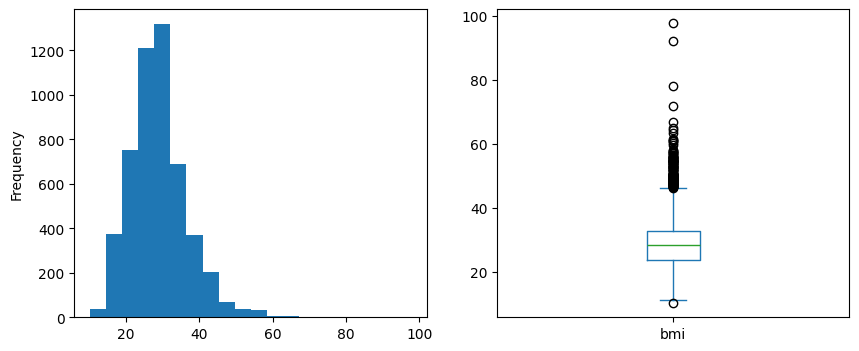

In [143]:
#cek outlier pada bmi
import matplotlib.pyplot as plt

fig, ax = plt.subplots(ncols=2,figsize=(10,4))

df['bmi'].plot(kind='hist',bins=20,ax=ax[0])
df['bmi'].plot(kind='box',ax=ax[1])

In [18]:
q3 = df.bmi.quantile(0.75)
q1 = df.bmi.quantile(0.25)

iqr = q3 - q1

low_bound = q1 - (iqr * 1.5)
up_bound = q3 + (iqr * 1.5)

print(f'Minimum boundary adalah: {low_bound}')
print(f'Maximum boundary adalah: {up_bound}')

outlier = df[(df['bmi'] < low_bound) | (df['bmi'] > up_bound)]

print(f'Total outlier {len(outlier)} data')
print(f'Persentase outlier pada data adalah sebesar {len(outlier)*100/len(df["bmi"]):.2f}%')

Minimum boundary adalah: 10.300000000000006
Maximum boundary adalah: 46.29999999999999
Total outlier 126 data
Persentase outlier pada data adalah sebesar 2.47%


Dikarenakan persentase outlier pada BMI kecil, kita akan biarkan dan menggunakan non-parametrik untuk inferensial.

<Axes: >

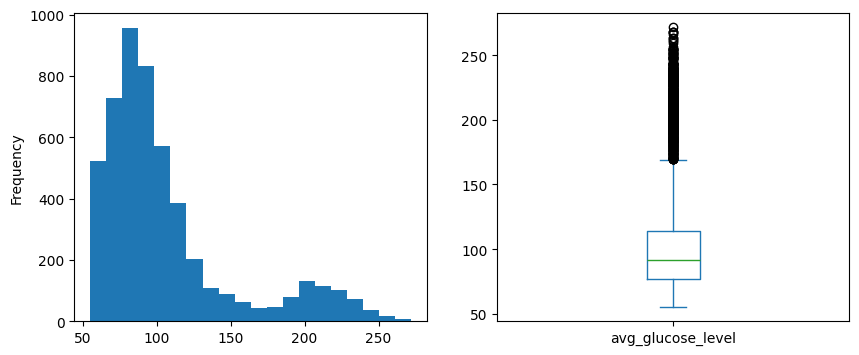

In [145]:
#cek outlier pada glucose level
import matplotlib.pyplot as plt

fig, ax = plt.subplots(ncols=2,figsize=(10,4))

df['avg_glucose_level'].plot(kind='hist',bins=20,ax=ax[0])
df['avg_glucose_level'].plot(kind='box',ax=ax[1])

In [19]:
q3 = df.avg_glucose_level.quantile(0.75)
q1 = df.avg_glucose_level.quantile(0.25)

iqr = q3 - q1

low_bound = q1 - (iqr * 1.5)
up_bound = q3 + (iqr * 1.5)

print(f'Minimum boundary adalah: {low_bound}')
print(f'Maximum boundary adalah: {up_bound}')

outlier = df[(df['avg_glucose_level'] < low_bound) | (df['avg_glucose_level'] > up_bound)]

print(f'Total outlier {len(outlier)} data')
print(f'Persentase outlier pada data adalah sebesar {len(outlier)*100/len(df["avg_glucose_level"]):.2f}%')

Minimum boundary adalah: 21.977500000000006
Maximum boundary adalah: 169.35750000000002
Total outlier 627 data
Persentase outlier pada data adalah sebesar 12.27%


Hasil persentase outlier pada glucose level cukup besar yaitu 12.27%, maka akan kita biarkan saja. Kita akan memakai perhitungan non-parametrik yang tidak perlu memperhatikan distribusi data.

### 5.2 Statistik Inferensial

##### 5.2.1 Menguji apakah ada perbedaan yang signifikan dalam umur terhadap pengidap stroke dan yang tidak mengidap stroke 

dikarenakan sample umur terdistribusi normal, maka kita akan menggunakan two sample t-test.

H0 = Terdapat perbedaan yang signifikan dalam umur antara pengidap stroke dan yang tidak mengidap stroke
        
H1 = Tidak terdapat perbedaan yang signifikan dalam umur antara pengidap stroke dan yang tidak mengidap stroke.

In [16]:
from scipy.stats import ttest_ind

# Pisahkan kelompok data berdasarkan status stroke
stroke_group = df[df['stroke'] == 1]
non_stroke_group = df[df['stroke'] == 0]

# Hitung rerata umur untuk setiap kelompok
mean_age_stroke = stroke_group['age'].mean()
mean_age_non_stroke = non_stroke_group['age'].mean()

# Uji two sample t-test
t_statistic, p_value = ttest_ind(stroke_group['age'], non_stroke_group['age'])

print('Mean age for stroke group:', mean_age_stroke)
print('Mean age for non-stroke group:', mean_age_non_stroke)
print('T Statistic:', t_statistic)
print('P Value:', p_value)

# Keputusan berdasarkan p-value
alpha = 0.05
if p_value < alpha:
    print('Tidak terdapat perbedaan yang signifikan dalam umur antara pengidap stroke dan yang tidak mengidap stroke.')
else:
    print('Terdapat perbedaan yang signifikan dalam umur antara pengidap stroke dan yang tidak mengidap stroke.')


Mean age for stroke group: 67.72690763052209
Mean age for non-stroke group: 41.95967907837893
T Statistic: 18.07069481739025
P Value: 8.35684428029718e-71
Tidak terdapat perbedaan yang signifikan dalam umur antara pengidap stroke dan yang tidak mengidap stroke.


Kelompok pengidap stroke rerata umurnya adalah 67.73 tahun atau dibulatkan ke 68 tahun.
Kelompok non-stroke: rerata umurnya adalah 41.96 tahun, pembulatan ke 42 tahun.

Selain itu, nilai T statistik sebesar 18.07 dan p value > 0.05 menunjukkan bahwa tidak terdapat perbedaan yang signifikan dalam usia antara kelompok orang yang mengidap stroke dan yang tidak, dimana H0 diterima.

Dapat disimpulkan mungkin memang tidak ada korelasi antara umur dan stroke, tetapi orang-orang yang mengalami stroke cenderung memiliki usia yang lebih tinggi daripada mereka yang tidak mengalami stroke.

##### 5.2.2 Uji korelasi BMI dan kadar glukosa, apakah dapat meningkatkan resiko terkena stroke?

Dikarenakan BMI dan kadar glukosa memiliki outlier yang cukup besar, maka kita akan memakai Spearman untuk uji korelasi.

Jika p value < 0.05

H0 = Terdapat hubungan yang signifikan antara BMI dan kadar glukosa terhadap risiko terkena stroke.

H1 = Tidak terdapat hubungan yang signifikan antara BMI dan kadar glukosa terhadap risiko terkena stroke.

In [12]:
from scipy.stats import spearmanr

data = {
    'bmi': df['bmi'],
    'avg_glucose_level': df['avg_glucose_level'],
}
df_corr = pd.DataFrame(data)

# Hitung korelasi Spearman
corr_coef, p_value = spearmanr(df_corr['bmi'], df_corr['avg_glucose_level'])

print('Korelasi Spearman antara BMI dan kadar glukosa:', corr_coef)
print('P-Value:', p_value)

# Interpretasi hasil
if p_value < 0.05:
    print('Tidak terdapat hubungan yang signifikan antara BMI dan kadar glukosa terhadap risiko terkena stroke.')
else:
    print('Terdapat hubungan yang signifikan antara BMI dan kadar glukosa terhadap risiko terkena stroke.')

    

Korelasi Spearman antara BMI dan kadar glukosa: 0.11369630776085582
P-Value: 3.580912687123695e-16
Tidak terdapat hubungan yang signifikan antara BMI dan kadar glukosa terhadap risiko terkena stroke.


Nilai p value > 0.05 menandakan bahwa adanya perbedaan signifikan dan adanya hubungan antara BMI dengan kadar glukosa terhadap resiko stroke.

##### 5.2.3 Apakah beban kerja (workload) dan gender dapat mempengaruhi, terutama lelaki lebih beresiko terkena stroke?

kita akan menggunakan two sample t-test karena menguji 2 sample independen terhadap beban kerja.

H0 = Terdapat perbedaan yang signifikan antara beban kerja dan gender dalam mempengaruhi resiko terkena stroke.
        
H1 = Tidak terdapat perbedaan yang signifikan dantara beban kerja dan gender dalam mempengaruhi resiko terkena stroke.

In [13]:
from scipy.stats import ttest_ind

# Membagi data berdasarkan gender
male_workload = df[df['gender_cat'] == 2]['work_cat']
female_workload = df[df['gender_cat'] == 1]['work_cat']

# Uji t independen
t_statistic, p_value = ttest_ind(male_workload, female_workload)

print('T Statistic:', t_statistic)
print('P Value:', p_value)

# Keputusan berdasarkan p-value
alpha = 0.05
if p_value < alpha:
    print('Tidak ada perbedaan yang signifikan antara beban kerja dan gender dalam mempengaruhi resiko terkena stroke.')
else:
    print('Ada perbedaan yang signifikan antara beban kerja dan gender dalam mempengaruhi resiko terkena stroke.')



T Statistic: 2.4137964823337215
P Value: 0.01582223214218107
Tidak ada perbedaan yang signifikan antara beban kerja dan gender dalam mempengaruhi resiko terkena stroke.


Hasil uji t-test menunjukkan bahwa terdapat perbedaan yang signifikan antara beban kerja dan gender dalam mempengaruhi resiko terkena stroke. Selain itu, nilai p < 0.05 menunjukkan bahwa perbedaan ini dianggap signifikan.

##### 5.2.4 Hypothesis testing: Apakah merokok sebagai salah satu penyebab stroke?

Kita akan menggunakan Chi-square untuk non-parametrik dimana untuk menguji dua variabel kategorik yaitu kolom merokok dan stroke.

dimana:

H0 = tidak terdapat hubungan yang signifikan antara merokok dengan stroke

H1 = terdapat hubungan yang signifikan antara merokok dengan stroke

In [23]:
#kategorikan stroke
df['stroke'].replace({0: 'Not having stroke', 1: 'Had a stroke'}, inplace=True)
df

C:\Users\Amelia Puspita Sari\AppData\Local\Temp\ipykernel_23548\2958467926.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['stroke'].replace({0: 'Not having stroke', 1: 'Had a stroke'}, inplace=True)


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_cat,age_cat,avg_glucose_level_cat,gender_cat,work_cat
0,Male,67,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,Had a stroke,Obesity,Elderly,High,2,1
1,Female,61,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,Had a stroke,Overweight,Elderly,High,1,2
2,Male,80,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,Had a stroke,Obesity,Elderly,Normal,2,1
3,Female,49,0,0,Yes,Private,Urban,171.23,34.400000,smokes,Had a stroke,Obesity,Adults,High,1,1
4,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,Had a stroke,Ideal,Elderly,High,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,Not having stroke,Overweight,Elderly,Low,1,1
5106,Female,81,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,Not having stroke,Obesity,Elderly,Normal,1,2
5107,Female,35,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,Not having stroke,Obesity,Young Adults,Low,1,2
5108,Male,51,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,Not having stroke,Overweight,Adults,High,2,1


In [24]:
#cek kolom smoking status
df['smoking_status'].value_counts()

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64

In [17]:
from scipy.stats import chi2_contingency

# contingency table
contingency_table = pd.crosstab(df['smoking_status'], df['stroke'])
print(contingency_table)

# Uji chi-square
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Menampilkan hasil uji chi-square
print("p-value:", p)

stroke              0   1
smoking_status           
Unknown          1497  47
formerly smoked   815  70
never smoked     1802  90
smokes            747  42
p-value: 2.0853997025008455e-06


Dengan p value < 0.05, H0 ditolak. dapat disimpulkan bahwa terdapat hubungan yang signifikan antara kebiasaan merokok dan stroke. orang yang merokok memiliki kemungkinan yang lebih tinggi untuk mengalami stroke dibandingkan dengan orang yang tidak merokok.

##### 5.2.5 Hypothesis testing: Apakah orang pengidap penyakit jantung beresiko terkena stroke?

Kita akan menggunakan Chi-square untuk non-parametrik dimana untuk menguji dua variabel kategorik yaitu kolom pengidap penyakit jantung dan stroke.

dimana:

H0 = tidak terdapat hubungan yang signifikan antara penyakit jantung dengan stroke

H1 = terdapat hubungan yang signifikan antara penyakit jantung dengan stroke

In [14]:
#kategorikan heart disease
df['heart_disease'].replace({0: 'No heart disease', 1: 'Had heart disease'}, inplace=True)
df

C:\Users\Amelia Puspita Sari\AppData\Local\Temp\ipykernel_5728\3243931565.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['heart_disease'].replace({0: 'No heart disease', 1: 'Had heart disease'}, inplace=True)


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_cat,age_cat,avg_glucose_level_cat,gender_cat,work_cat
0,Male,67,0,Had heart disease,Yes,Private,Urban,228.69,36.600000,formerly smoked,1,Obesity,Elderly,High,2,1
1,Female,61,0,No heart disease,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1,Overweight,Elderly,High,1,2
2,Male,80,0,Had heart disease,Yes,Private,Rural,105.92,32.500000,never smoked,1,Obesity,Elderly,Normal,2,1
3,Female,49,0,No heart disease,Yes,Private,Urban,171.23,34.400000,smokes,1,Obesity,Adults,High,1,1
4,Female,79,1,No heart disease,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1,Ideal,Elderly,High,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80,1,No heart disease,Yes,Private,Urban,83.75,28.893237,never smoked,0,Overweight,Elderly,Low,1,1
5106,Female,81,0,No heart disease,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0,Obesity,Elderly,Normal,1,2
5107,Female,35,0,No heart disease,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0,Obesity,Young Adults,Low,1,2
5108,Male,51,0,No heart disease,Yes,Private,Rural,166.29,25.600000,formerly smoked,0,Overweight,Adults,High,2,1


In [27]:
#cek kolom
df['heart_disease'].value_counts()

heart_disease
No heart disease     4834
Had heart disease     276
Name: count, dtype: int64

In [15]:
from scipy.stats import chi2_contingency

# contingency table
contingency_table = pd.crosstab(df['heart_disease'], df['stroke'])
print(contingency_table)

# Uji chi-square
# Uji chi-square
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Menampilkan hasil uji chi-square
print("p-value:", p)

stroke                0    1
heart_disease               
Had heart disease   229   47
No heart disease   4632  202
p-value: 2.0887845685229236e-21


Dengan p value < 0.05, H0 ditolak. dapat disimpulkan bahwa terdapat hubungan yang signifikan antara pengidap penyakit jantung dan stroke. orang yang mengidap penyakit jantung memiliki kemungkinan yang lebih tinggi untuk mengalami stroke dibandingkan dengan orang yang tidak mengidap penyakit jantung.

### 5.3 Visualisasi Data

#### Persentase stroke dalam dataset

In [30]:
#import library
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [174]:
stroke_count = df['stroke'].value_counts()

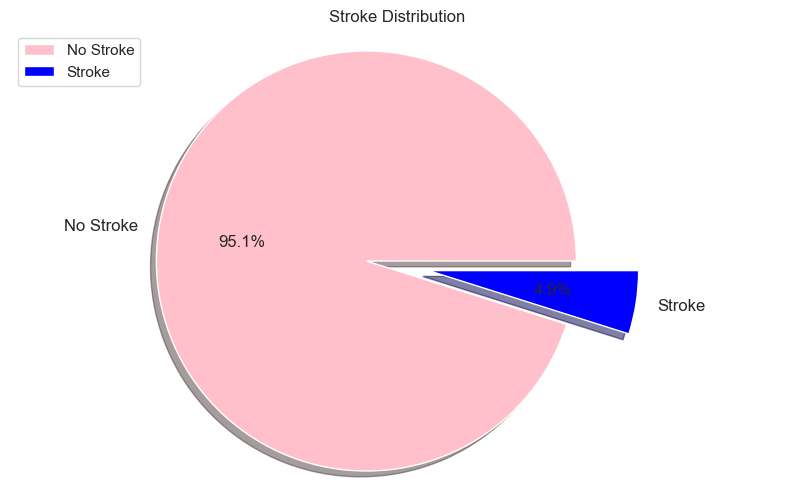

In [179]:
#pie chart
plt.figure(figsize=(10, 6))
plt.pie(stroke_count, labels=['No Stroke', 'Stroke'], autopct='%1.1f%%',
        colors=['pink', 'blue'], explode=(0.2, 0.1), shadow=True,
        textprops={'fontsize': 12})
plt.title('Stroke Distribution')
plt.legend(loc='upper left')
plt.axis('equal')
plt.show()

Berdasarkan visualisasi, dalam dataset ini hanya 4.9% responden yang mengidap stroke.

#### Persentase work type

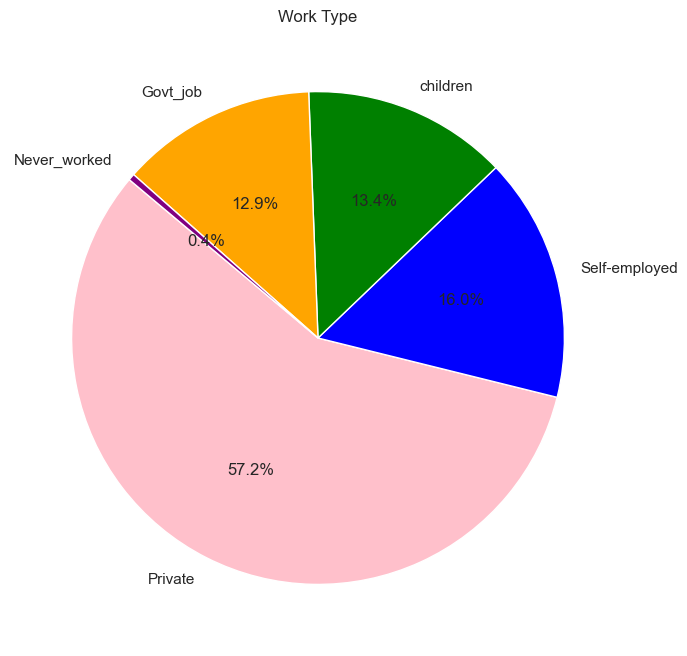

In [202]:
work_type_counts = df['work_type'].value_counts()

# pie chart
plt.figure(figsize=(8, 8))
plt.pie(work_type_counts, labels=work_type_counts.index, autopct='%1.1f%%', startangle=140, colors=['pink', 'blue', 'green', 'orange', 'purple'])

# judul
plt.title('Work Type')

plt.show()

untuk tipe pekerjaan responden:

- 57.2% karyawan swasta

- 16% self-employed 

- 13.4% masih belum bekerja (anak-anak/pelajar)

- 12.9% bekerja di pemerintahan

- 0.4% belum pernah bekerja

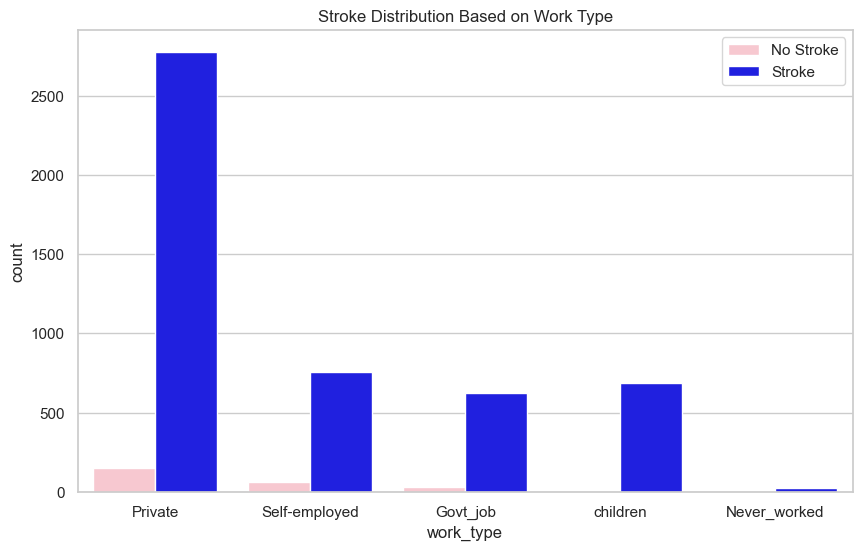

In [200]:
plt.figure(figsize=(10,6))
sns.countplot(x="work_type", data=df, palette={'Not having stroke':'blue', 'Had a stroke':'pink'}, hue='stroke')
plt.legend(['No Stroke', 'Stroke'])
plt.title('Stroke Distribution Based on Work Type')
plt.show()

Jumlah responden yang bekerja sebagai karyawan swasta tertinggi dan tidak mengalami stroke dibandingkan dengan responden yang bekerja sendiri, di pemerintahan, anak-anak, dan yang belum pernah bekerja. Jumlah kasus stroke relatif rendah di semua kategori pekerjaan.

#### Distribusi umur dalam dataset

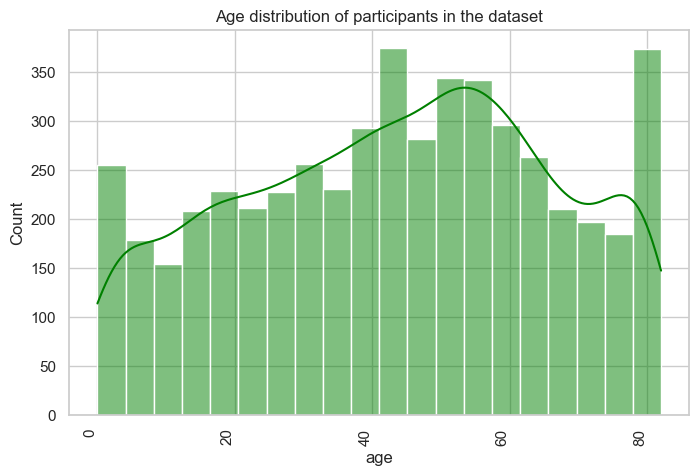

In [213]:
plt.figure(figsize=(8, 5))
sns.set_theme(style="whitegrid")

sns.histplot(df['age'], kde=True, color='green') 

plt.title(f'Age distribution of participants in the dataset')
plt.xticks(rotation=90, ha="right")
plt.show()

Mayoritas partisipan berusia antara 20 hingga 60 tahun, dengan puncak tertinggi terjadi pada kelompok usia sekitar 40 tahun. 

#### Stroke dengan umur

<Figure size 2000x1000 with 0 Axes>

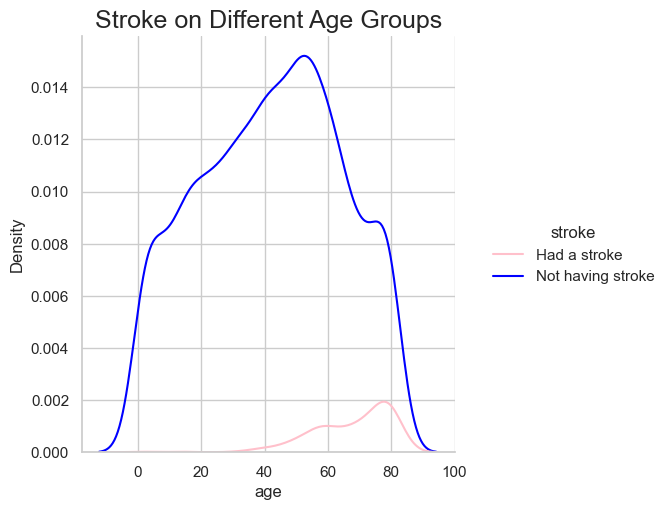

In [186]:
plt.figure(figsize=(20,10))

sns.displot(data=df, x="age", hue="stroke", kind="kde", palette=['pink', 'blue'])
plt.title("Stroke on Different Age Groups", fontsize=18)

plt.show()

Dari grafik ini, kita dapat melihat bahwa resiko stroke cenderung meningkat seiring bertambahnya usia, terutama setelah usia 60 tahun. 

#### Distribusi data numerikal (age, BMI dan glucose level)

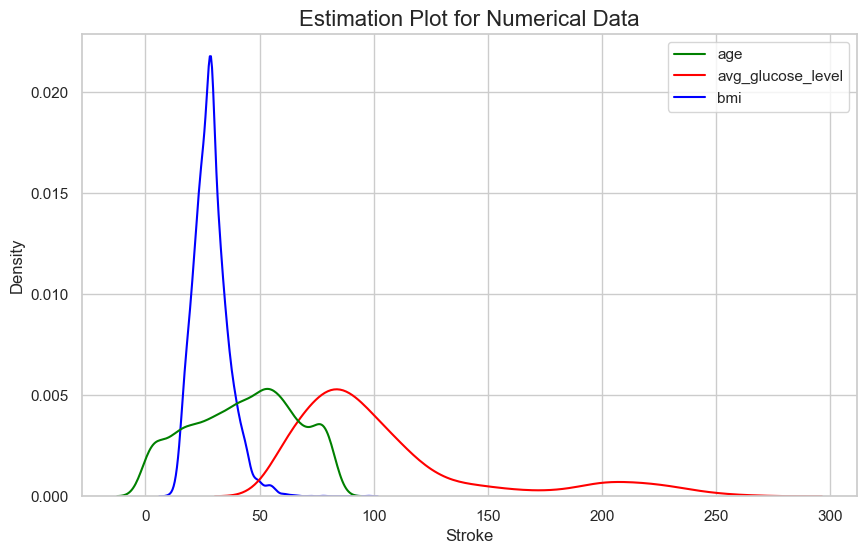

In [215]:
numerical_data = df[['age', 'avg_glucose_level', 'bmi']]

plt.figure(figsize=(10, 6))
sns.kdeplot(data=numerical_data, palette=['green', 'red', 'blue'])
plt.title("Estimation Plot for Numerical Data", fontsize=16)

# Menambahkan label sumbu x
plt.xlabel("Stroke")

plt.show()

- Distribusi kadar glukosa cenderung condong ke kiri. Sebagian besar responden memiliki kadar glukosa yang normal, dan distribusi tingkat glukosa terlihat ke arah nilai yang lebih rendah. 

- BMI mempunyai skew tinggi, kemungkinan besar bmi yang tinggi juga rentan resiko stroke

#### BMI dengan stroke

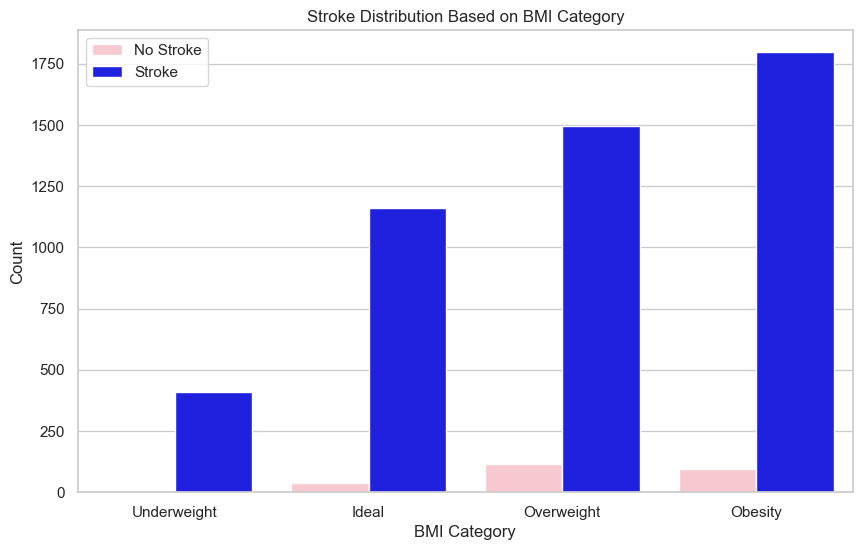

In [210]:
plt.figure(figsize=(10, 6))
sns.countplot(x="bmi_cat", data=df, hue="stroke", palette={'Not having stroke':'blue', 'Had a stroke':'pink'})
plt.title('Stroke Distribution Based on BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('Count')
plt.legend(['No Stroke', 'Stroke'])
plt.show()

Walaupun jumlah responden yang tidak mengidap stroke lebih banyak, tetapi jumlah pengidap stroke terbanyak berada di kategori overweight dan obesitas.

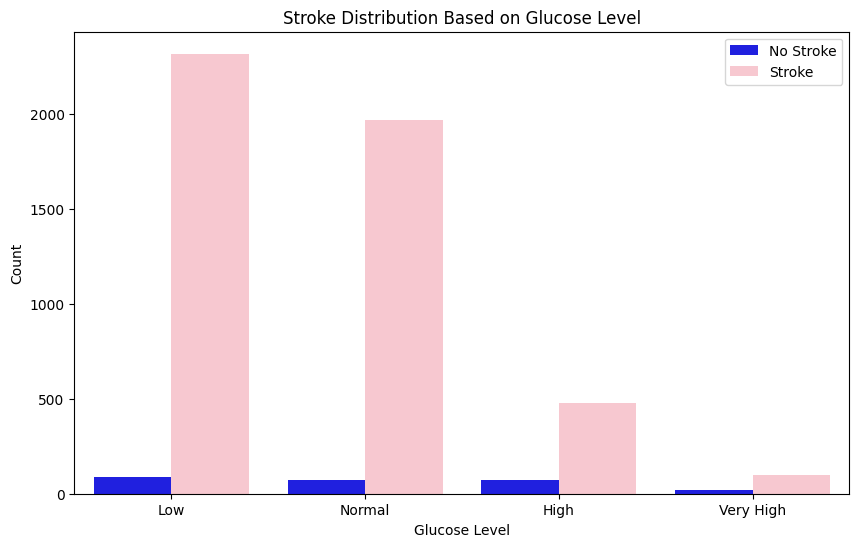

In [34]:
plt.figure(figsize=(10, 6))
sns.countplot(x="avg_glucose_level_cat", data=df, hue="stroke", palette={'Not having stroke':'pink', 'Had a stroke':'blue'})
plt.title('Stroke Distribution Based on Glucose Level')
plt.xlabel('Glucose Level')
plt.ylabel('Count')
plt.legend(['No Stroke', 'Stroke'])
plt.show()

#### Jumlah stroke yang juga mengidap heart disease

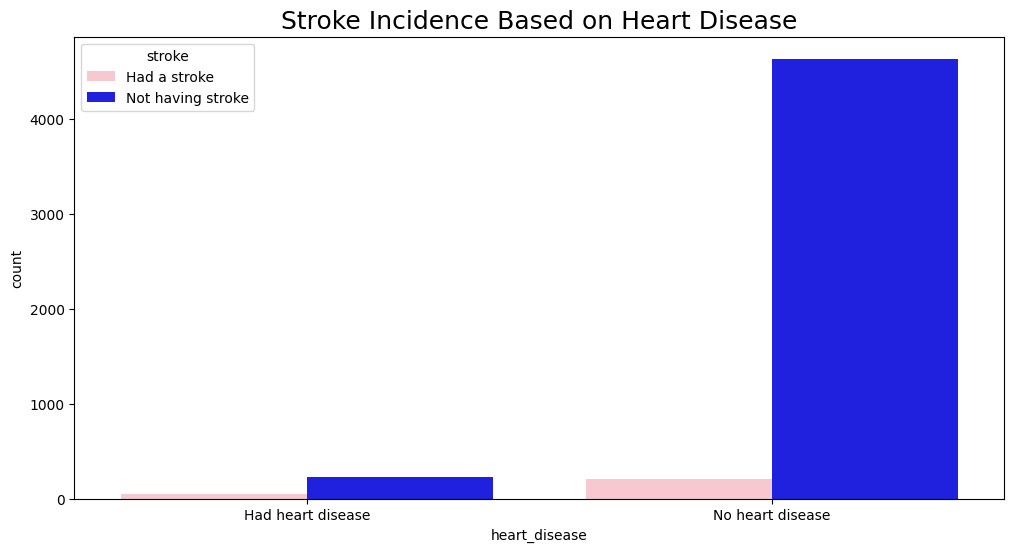

In [33]:
plt.figure(figsize=(12, 6))
palette = ['pink', 'blue']  # Menentukan warna pink dan biru
sns.countplot(x=df['heart_disease'], hue=df['stroke'], palette=palette)
plt.title('Stroke Incidence Based on Heart Disease', fontsize=18)
plt.show()

Orang yang tidak memiliki riwayat penyakit jantung memiliki resiko stroke yang rendah, sementara orang yang memiliki riwayat penyakit jantung menunjukkan peningkatan resiko untuk mengidap stroke.

Dari grafik ini, dapat disimpulkan bahwa penyakit jantung merupakan salah satu faktor resiko stroke.

#### Gender dengan stroke

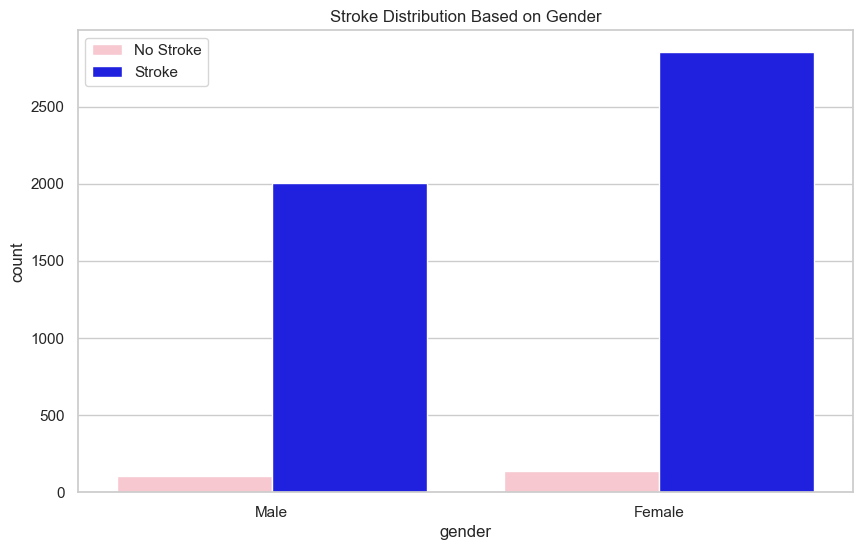

In [209]:
plt.figure(figsize=(10,6))
sns.countplot(x="gender", data=df, palette={'Not having stroke':'blue', 'Had a stroke':'pink'}, hue='stroke')
plt.legend(['No Stroke', 'Stroke'])
plt.title('Stroke Distribution Based on Gender')
plt.show()

Jumlah lelaki yang tidak mengalami stroke jauh lebih banyak dibandingkan yang mengalami stroke. Begitu juga pada kategori perempuan, di mana jumlah orang yang tidak mengalami stroke sangat dominan dibandingkan dengan yang mengalami stroke.

#### Perokok dengan stroke

Text(0.5, 1.0, 'Stroke Distribution Based on Smoking Status')

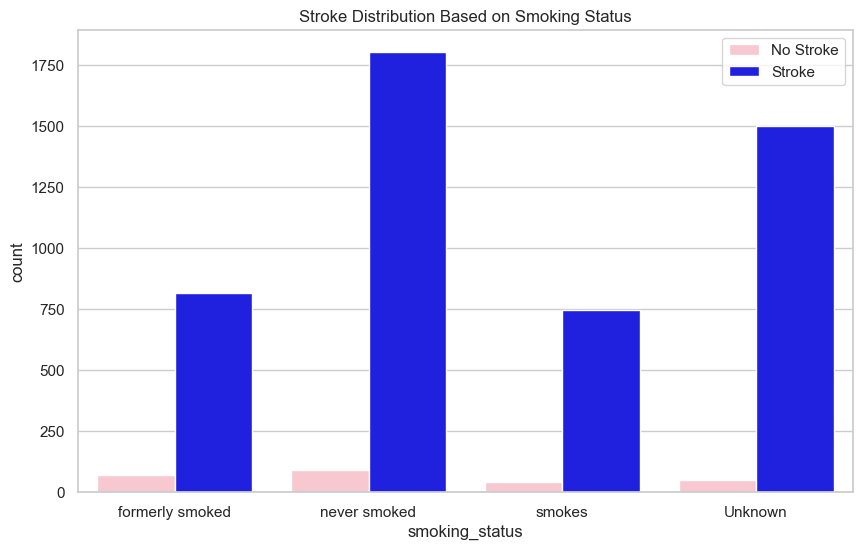

In [207]:
plt.figure(figsize=(10,6))
sns.countplot(x="smoking_status", data=df, palette={'Not having stroke':'blue', 'Had a stroke':'pink'}, hue='stroke')
plt.legend(['No Stroke', 'Stroke'])
plt.title('Stroke Distribution Based on Smoking Status')

Orang yang tidak pernah merokok memiliki jumlah tertinggi yang tidak mengalami stroke, diikuti oleh yang status merokoknya tidak diketahui, pernah merokok, dan perokok aktif.

Jumlah orang yang belum mengalami stroke jauh lebih tinggi di semua kategori.

# 6. Kesimpulan

#### 
- Orang-orang yang mengalami stroke cenderung memiliki usia yang lebih tinggi daripada mereka yang tidak mengalami stroke. Dapat dikatakan bahwa usia menjadi faktor resiko dalam stroke

- semakin tinggi BMI seseorang, semakin tinggi juga kadar glukosa dalam darahnya. Kondisi ini dapat meningkatkan risiko terkena stroke. Oleh karena itu, penting untuk menjaga berat badan yang sehat dan mengontrol kadar glukosa agar mengurangi risiko stroke

- beban kerja dan gender terindikasi memiliki peran penting dalam memengaruhi resiko terkena stroke. Namun, perlu dilakukan penelitian lebih lanjut untuk memahami hubungan ini dan mengambil tindakan pencegahan yang sesuai

- orang yang merokok memiliki kemungkinan lebih tinggi untuk mengalami stroke dibandingkan dengan orang yang tidak merokok

- orang yang mengidap penyakit jantung memiliki kemungkinan yang lebih tinggi untuk mengalami stroke dibandingkan dengan orang yang tidak mengidap penyakit jantung

Tentunya, hasil analisa dataset ini tidak dapat dijadikan acuan untuk diagnosa stroke. Hanya saja, dengan mengetahui bahwa banyaknya faktor resiko yang dapat membuat seseorang terkena stroke diharapkan mampu membantu masyarakat untuk lebih memperhatikan kondisi kesehatan dan mencegah. Tetaplah kunjungi faskes untuk mendapatkan perawatan lanjutan.

#### simpan ke csv

In [211]:
df.to_csv('stroke.csv', index=False)